In [1]:
import sys
sys.path.append("../")
import numpy as np

In [2]:
from soda.util.config import Config

In [3]:
config_game = {
    "mechanism": 'soda.mechanism.single_item.SingleItemAuction',
    
    "bidder": ['1', '1'], 
    "o_space": {'1': [0, 1], '2': [0, 1]}, 
    "a_space": {'1': [0, 1], '2': [0, 1]}, 

    "n": 64, 
    "m": 64,
    
    "param_prior": {
        'distribution': 'uniform',        
        },
    
    "param_util": {
        'payment_rule':'first_price', 
        'tie_breaking': 'lose', 
        'utility_type': 'QL',
        'reserve_price': 0.25,
        #'budget': 1.01,
        #'budget_parameter': 1/5,
    },
}
config_learner = "../../projects/ad_auctions/configs/learner/soda1_revenue.yaml"

In [4]:
config = Config(config_game, config_learner)
game, learner = config.create_setting()
game.get_utility()

In [5]:
strategies = config.create_strategies(game)
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

 72%|██████████████▎     | 3.58k/5.00k [00:01<00:00, 2.64kit/s]

Convergence after 3581 iterations
Value of stopping criterion (util_loss) 0.0001


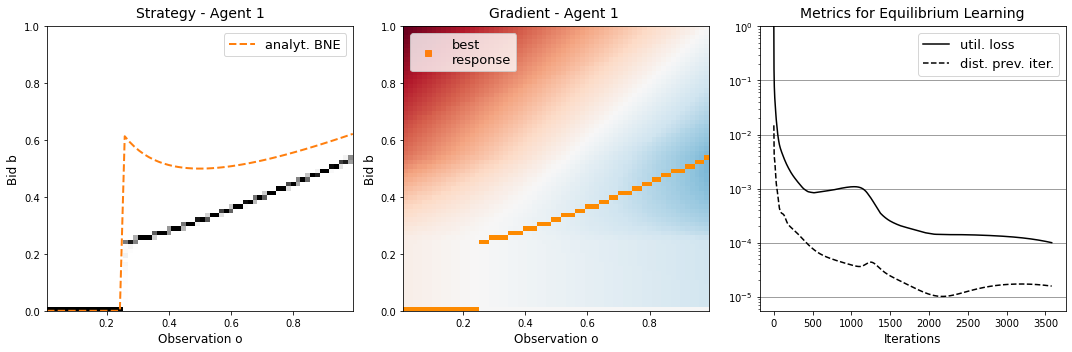

In [8]:
beta = lambda x: np.where(x <= 0.25, 0, 1/2*x + 1/2 * 0.5**2/x)
strategies['1'].plot(grad=True, metrics=True, beta=beta)

In [7]:
import matplotlib.pyplot as plt

In [ ]:
n = 2
util = lambda r: 1/(n*(n+1))*(1 - (n+1)*r**n + n*r**(n+1))

In [ ]:
plt.plot(strategies['1'].utility)
plt.axhline(y = util(0.5))

In [ ]:
strategies['1'].utility[2000]

In [ ]:
n_obs = int(2**22)
obs = game.mechanism.sample_types(n_obs)
bids = np.array([strategies[agent].sample_bids(obs[i]) for i, agent in enumerate(game.bidder)])
game.mechanism.compute_expected_revenue(bids)

In [ ]:
# first-price  0.3946260219528563
# second-price 0.39839937005724213

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
plt.bar([0,1, 3, 4, 5, 6], [0.3946260219528563, 0.39839937005724213, 0, 0, 0, 0])
plt.ylim(0, 0.55)

In [ ]:
plt.plot(strategies['1'].x.sum(axis=1))

In [ ]:
(bids == 0.0).sum(), (bids > 0.0).sum()